In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Exploratary Data Analysis

In [3]:
# Shape of the data
data.shape

(12330, 18)

In [4]:
# Class imbalance
data['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

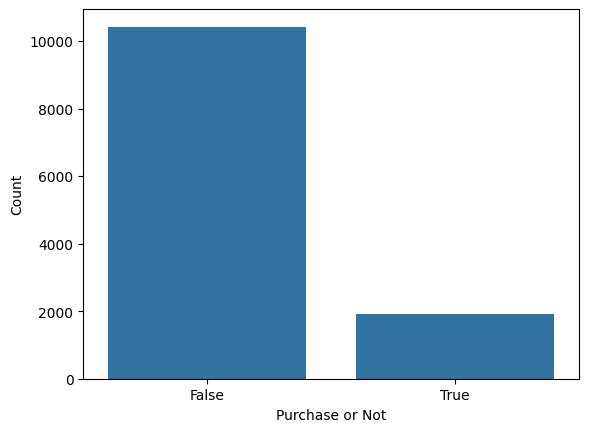

In [5]:
sns.countplot(data = data, x = data['Revenue'])
plt.xlabel('Purchase or Not')
plt.ylabel('Count');

In [6]:
# No missing values
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

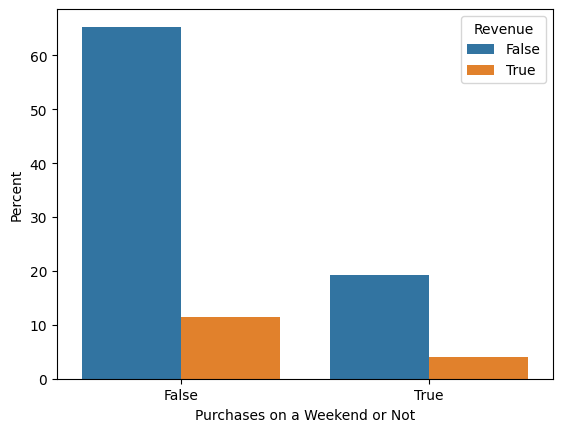

In [7]:
# Weekend Feature

sns.countplot(data = data, x = 'Weekend', hue = 'Revenue', stat = 'percent')
plt.ylabel('Percent')
plt.xlabel('Purchases on a Weekend or Not');

In [8]:
# Month Feature

data['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

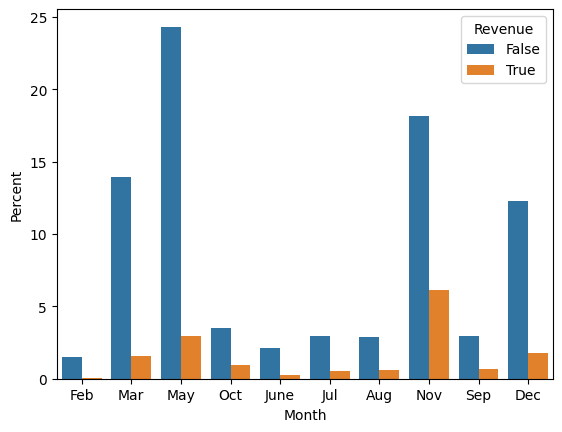

In [9]:
sns.countplot(data = data, x = 'Month', hue = 'Revenue', stat = 'percent')
plt.ylabel('Percent');

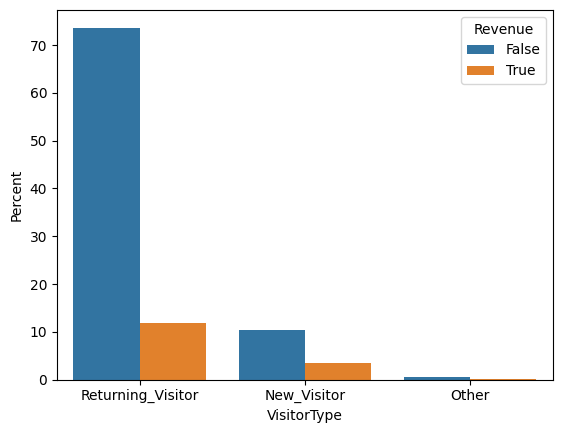

In [10]:
# Visitor Type Feature

sns.countplot(data = data, x = 'VisitorType', hue = 'Revenue', stat = 'percent')
plt.ylabel('Percent');

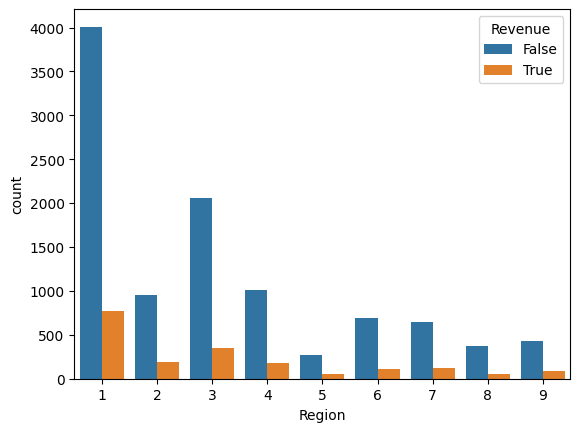

In [11]:
# Region Feature
sns.countplot(data = data, x = 'Region', hue = 'Revenue');

In [12]:
# Number of times each type of page was visited. 
admin_sum = sum(data['Administrative'])
infor_sum = sum(data['Informational'])
product_sum = sum(data['ProductRelated'])

admin_sum, infor_sum, product_sum

(28546, 6209, 391249)

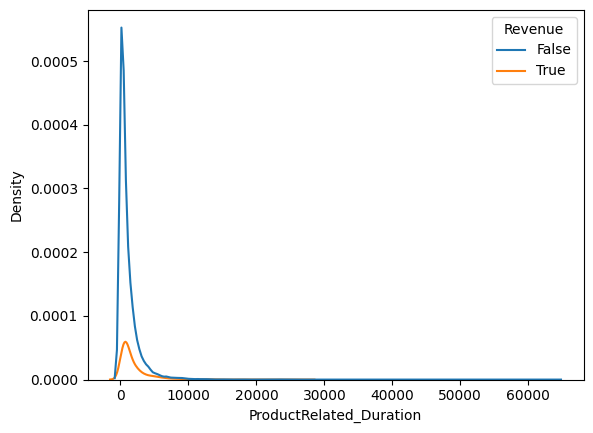

In [13]:
# Product Related Duration Feature
sns.kdeplot(data = data, x = 'ProductRelated_Duration', hue = 'Revenue');

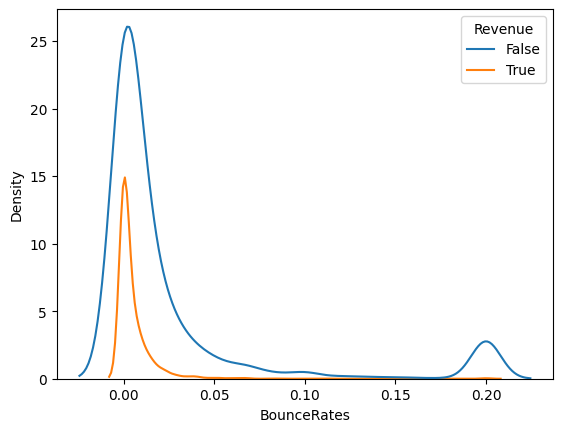

In [14]:
# Bounce Rates Feature
sns.kdeplot(data = data, x = 'BounceRates', hue = 'Revenue');

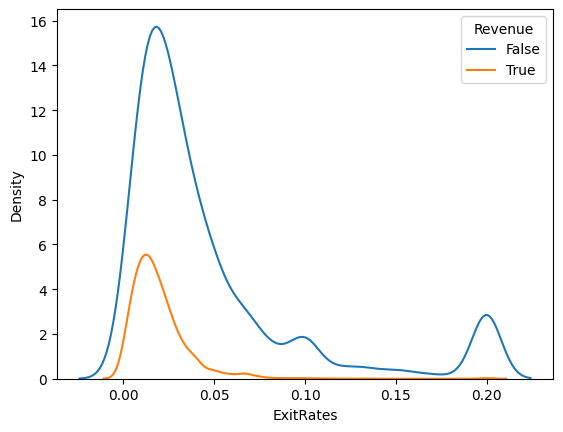

In [15]:
# Exit Rates Feature
sns.kdeplot(data = data, x = 'ExitRates', hue = 'Revenue');

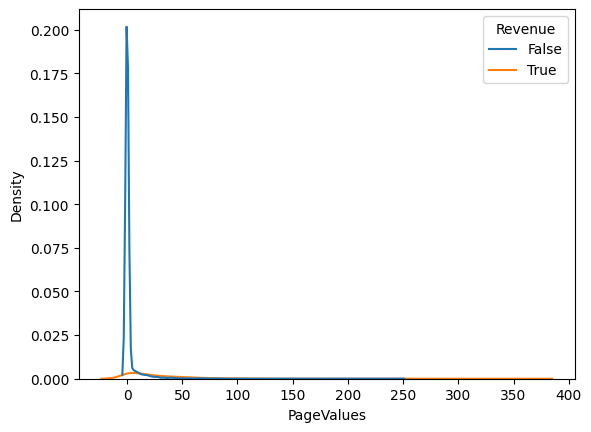

In [16]:
# Page Values Feature
sns.kdeplot(data = data, x = 'PageValues', hue = 'Revenue');

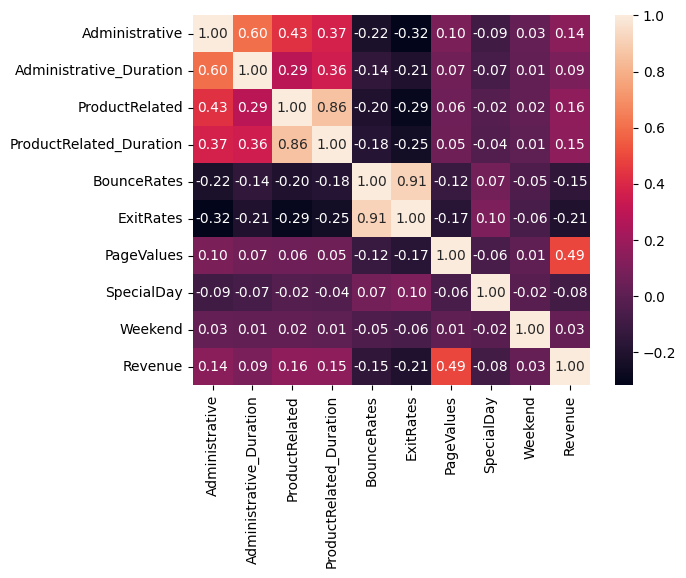

In [17]:
# Heatmap - Correlation Coefficient for Numerical Variables
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)
numeric = ['Administrative', 'Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 
           'ExitRates', 'PageValues', 'SpecialDay', 'Weekend', 'Revenue']
data_cor = data[numeric].corr()
sns.heatmap(data = data_cor, annot = True, fmt=".2f");

## Data Preprocessing

In [18]:
data_copy = data.copy()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data_copy['VisitorType'] = enc.fit_transform(data_copy[['VisitorType']])
data_copy['Month'] = enc.fit_transform(data_copy[['Month']])

scale = StandardScaler()
data_copy['Administrative'] = scale.fit_transform(data_copy[['Administrative']])
data_copy['Administrative_Duration'] = scale.fit_transform(data_copy[['Administrative_Duration']])
data_copy['ProductRelated'] = scale.fit_transform(data_copy[['ProductRelated']])
data_copy['ProductRelated_Duration'] = scale.fit_transform(data_copy[['ProductRelated_Duration']])
data_copy['BounceRates'] = scale.fit_transform(data_copy[['BounceRates']])
data_copy['ExitRates'] = scale.fit_transform(data_copy[['ExitRates']])
data_copy['PageValues'] = scale.fit_transform(data_copy[['PageValues']])

/Users/sakshikolli/Library/Python/3.8/lib/python/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sakshikolli/Library/Python/3.8/lib/python/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
data_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,0,0.0,-0.691003,-0.624348,3.667189,3.229316,-0.317178,0.0,2,1,1,1,1,2,0,0
1,-0.696993,-0.457191,0,0.0,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,0.0,2,2,2,1,2,2,0,0
2,-0.696993,-0.457191,0,0.0,-0.691003,-0.624348,3.667189,3.229316,-0.317178,0.0,2,4,1,9,3,2,0,0
3,-0.696993,-0.457191,0,0.0,-0.668518,-0.622954,0.573535,1.994610,-0.317178,0.0,2,3,2,2,4,2,0,0
4,-0.696993,-0.457191,0,0.0,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,0.0,2,3,3,1,4,2,1,0


In [21]:
X = data_copy[['Administrative', 'Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration',
              'BounceRates', 'ExitRates', 'PageValues', 'Month', 'Region', 'SpecialDay',
               'TrafficType', 'VisitorType', 'Weekend']]
y = data_copy['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Modeling

### Logistic Regression

In [22]:
lr_mod = LogisticRegression(random_state = 42)
lr_mod.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [23]:
from sklearn.metrics import accuracy_score

y_pred = lr_mod.predict(X_test)
lr_test_acc = accuracy_score(y_test, y_pred)
lr_test_acc

0.8706407137064072

In [24]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
tn = sum((y_pred == 0) & (y_pred == y_test))
fp = sum((y_pred == 1) & (y_pred != y_test))
fn = sum((y_pred == 0) & (y_pred != y_test))
tp = sum((y_pred == 1) & (y_pred == y_test))

print(tn, fp, fn, tp)

2006 49 270 141


In [25]:
# Precision = TP / (TP + FP)

lr_precision = tp / (tp + fp)
lr_precision

0.7421052631578947

In [26]:
# Recall = TP / (TP + FN)

lr_recall = tp / (tp + fn)
lr_recall

0.34306569343065696

In [27]:
# F1-score = (2 * precision * recall) / (precision + recall)

lr_f1_score = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
lr_f1_score

0.46921797004991683

### Random Forest Classifier

In [28]:
rf_mod = RandomForestClassifier(random_state = 42, max_depth = 10, n_estimators = 25)
rf_mod.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=42)

In [29]:
y_pred_rf = rf_mod.predict(X_test)
rf_test_acc = accuracy_score(y_test, y_pred_rf)
rf_test_acc

0.8990267639902676

In [30]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
TN = matrix_rf[0][0]
FP = matrix_rf[0][1]
FN = matrix_rf[1][0]
TP = matrix_rf[1][1]

print(TN, FP, FN, TP)

1987 68 181 230


In [31]:
# Precision = TP / (TP + FP)

rf_precision = TP / (TP + FP)
rf_precision

0.7718120805369127

In [32]:
# Recall = TP / (TP + FN)

rf_recall = TP / (TP + FN)
rf_recall

0.559610705596107

In [33]:
# F1-score = (2 * precision * recall) / (precision + recall)

rf_f1_score = (2 * rf_precision * rf_recall) / (rf_precision + rf_recall)
rf_f1_score

0.6488011283497883

### Over-Sampling with SMOTE

In [34]:
print("Before OverSampling, counts of positive label: {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of negative label: {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of positive label: 1497
Before OverSampling, counts of negative label: 8367 



In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print("After OverSampling, counts of positive label: {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of negative label: {}".format(sum(y_train_res == 0)))

After OverSampling, counts of positive label: 8367
After OverSampling, counts of negative label: 8367


### Logistic Regression

In [36]:
lr_model_over = LogisticRegression(random_state = 42)
lr_model_over.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42)

In [37]:
y_pred_lr_over = lr_model_over.predict(X_test)
lr_over_test_acc = accuracy_score(y_test, y_pred_lr_over)
lr_over_test_acc

0.8698296836982968

In [38]:
matrix_lr_over = confusion_matrix(y_test, y_pred_lr_over)
tn_over = matrix_lr_over[0][0]
fp_over = matrix_lr_over[0][1]
fn_over = matrix_lr_over[1][0]
tp_over = matrix_lr_over[1][1]

print(tn_over, fp_over, fn_over, tp_over)

1850 205 116 295


In [39]:
# Precision

precision_lr_over = tp_over / (tp_over + fp_over)
precision_lr_over

0.59

In [40]:
# Recall

recall_lr_over = tp_over / (tp_over + fn_over)
recall_lr_over

0.7177615571776156

In [41]:
# F1-score

f1_score_lr_over = (2 * precision_lr_over * recall_lr_over) / (precision_lr_over + recall_lr_over)
f1_score_lr_over

0.6476399560922064

### Random Forest Classifier

In [42]:
rf_model_over = RandomForestClassifier(random_state = 42, max_depth = 10, n_estimators = 25)
rf_model_over.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=42)

In [43]:
y_pred_rf_over = rf_model_over.predict(X_test)
rf_over_test_acc = accuracy_score(y_test, y_pred_rf_over)
rf_over_test_acc

0.8791565287915653

In [44]:
matrix_rf_over = confusion_matrix(y_test, y_pred_rf_over)
TN_over = matrix_rf_over[0][0]
FP_over = matrix_rf_over[0][1]
FN_over = matrix_rf_over[1][0]
TP_over = matrix_rf_over[1][1]

print(TN_over, FP_over, FN_over, TP_over)

1837 218 80 331


In [45]:
# Precision

precision_rf_over = TP_over / (TP_over + FP_over)
precision_rf_over

0.6029143897996357

In [46]:
# Recall

recall_rf_over = TP_over / (TP_over + FN_over)
recall_rf_over

0.805352798053528

In [47]:
# F1-score

f1_score_rf_over = (2 * precision_rf_over * recall_rf_over) / (precision_rf_over + recall_rf_over)
f1_score_rf_over

0.6895833333333334